## Dataset description:
Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

### Feature descriptions:
```python
Age – continuous feature
Workclass – continuous feature
fnlwgt – final weight of object, continuous feature
Education – categorical feature
Education_Num – number of years of education, continuous feature
Martial_Status – categorical feature
Occupation – categorical feature
Relationship – categorical feature
Race – categorical feature
Sex – categorical feature
Capital_Gain – continuous feature
Capital_Loss – continuous feature
Hours_per_week – continuous feature
Country – categorical feature
Target – earnings level, categorical (binary) feature.
```

## Loading Libraries

In [162]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus #pip install pydotplus

### Reading Train and Test data

In [2]:
data_train = pd.read_csv('adult_train.csv')

data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
data_test = pd.read_csv('adult_test.csv')
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


### Remove rows with 'nan' values from test dataset with respect to target variable and encode target variable as `0` and `1` for train and test data.

In [4]:
data_test.dropna(axis = 0, subset=['Target'],inplace = True)

In [5]:
data_test['Target'] = data_test['Target'].str.strip().str.replace('.', '')

data_train['Target'] = data_train['Target'].str.strip().str.replace('.', '')

In [6]:
le = LabelEncoder()
def encode_data(column):
    data_train[column] = le.fit_transform(data_train[column])
    data_test[column] = le.fit_transform(data_test[column])

encode_data('Target')

In [7]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Find the statistics of the test data and count the distribution of target variable in train data 

In [8]:
data_test.describe()

,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236,0.236226
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332,0.424776
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000


In [56]:
def plot_bar(dataframe, column) :
    sns.barplot(x = dataframe[column].value_counts().index, y = dataframe[column].value_counts())
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Count of {}'.format(column))

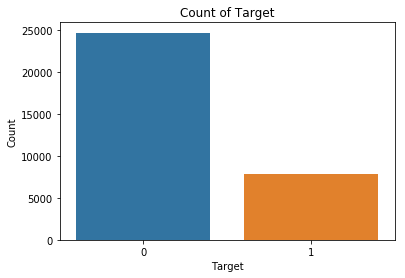

In [57]:
plot_bar(data_train, 'Target')

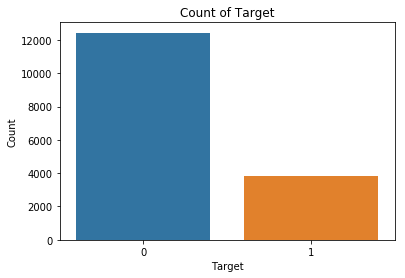

In [59]:
plot_bar(data_test, 'Target')

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

In [31]:
cat_features = (data_train.select_dtypes(include = 'object')).columns

num_features = [cols for cols in data_train if cols not in cat_features]

In [47]:
num_features

['Age',
 'fnlwgt',
 'Education_Num',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_per_week',
 'Target']

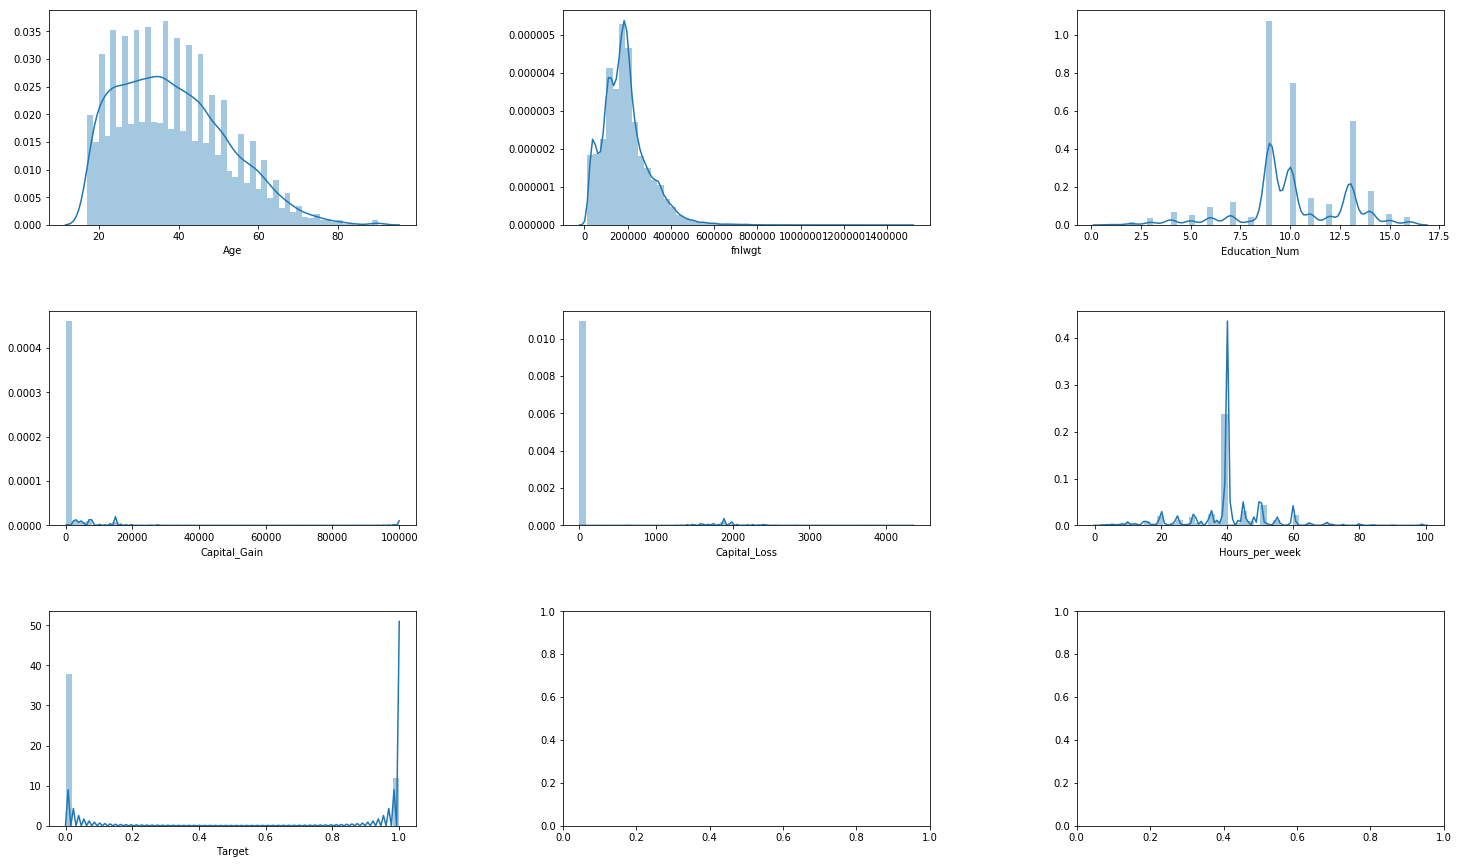

In [88]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,15))
plt.subplots_adjust(hspace=0.4, wspace = 0.4)
for i, j in np.ndindex(axes.shape):
    if (3* i + j) < len(num_features) :
        sns.distplot(data_train[num_features[3*i + j]], ax=axes[i, j])

In [100]:
def plot_bar(dataframe, column, axes) :
    plot = sns.barplot(x = dataframe[column].value_counts().index, y = dataframe[column].value_counts(), ax = axes)
    axes.set(title = 'Barplot of {}'.format(column), xlabel = column, ylabel = 'Count')
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

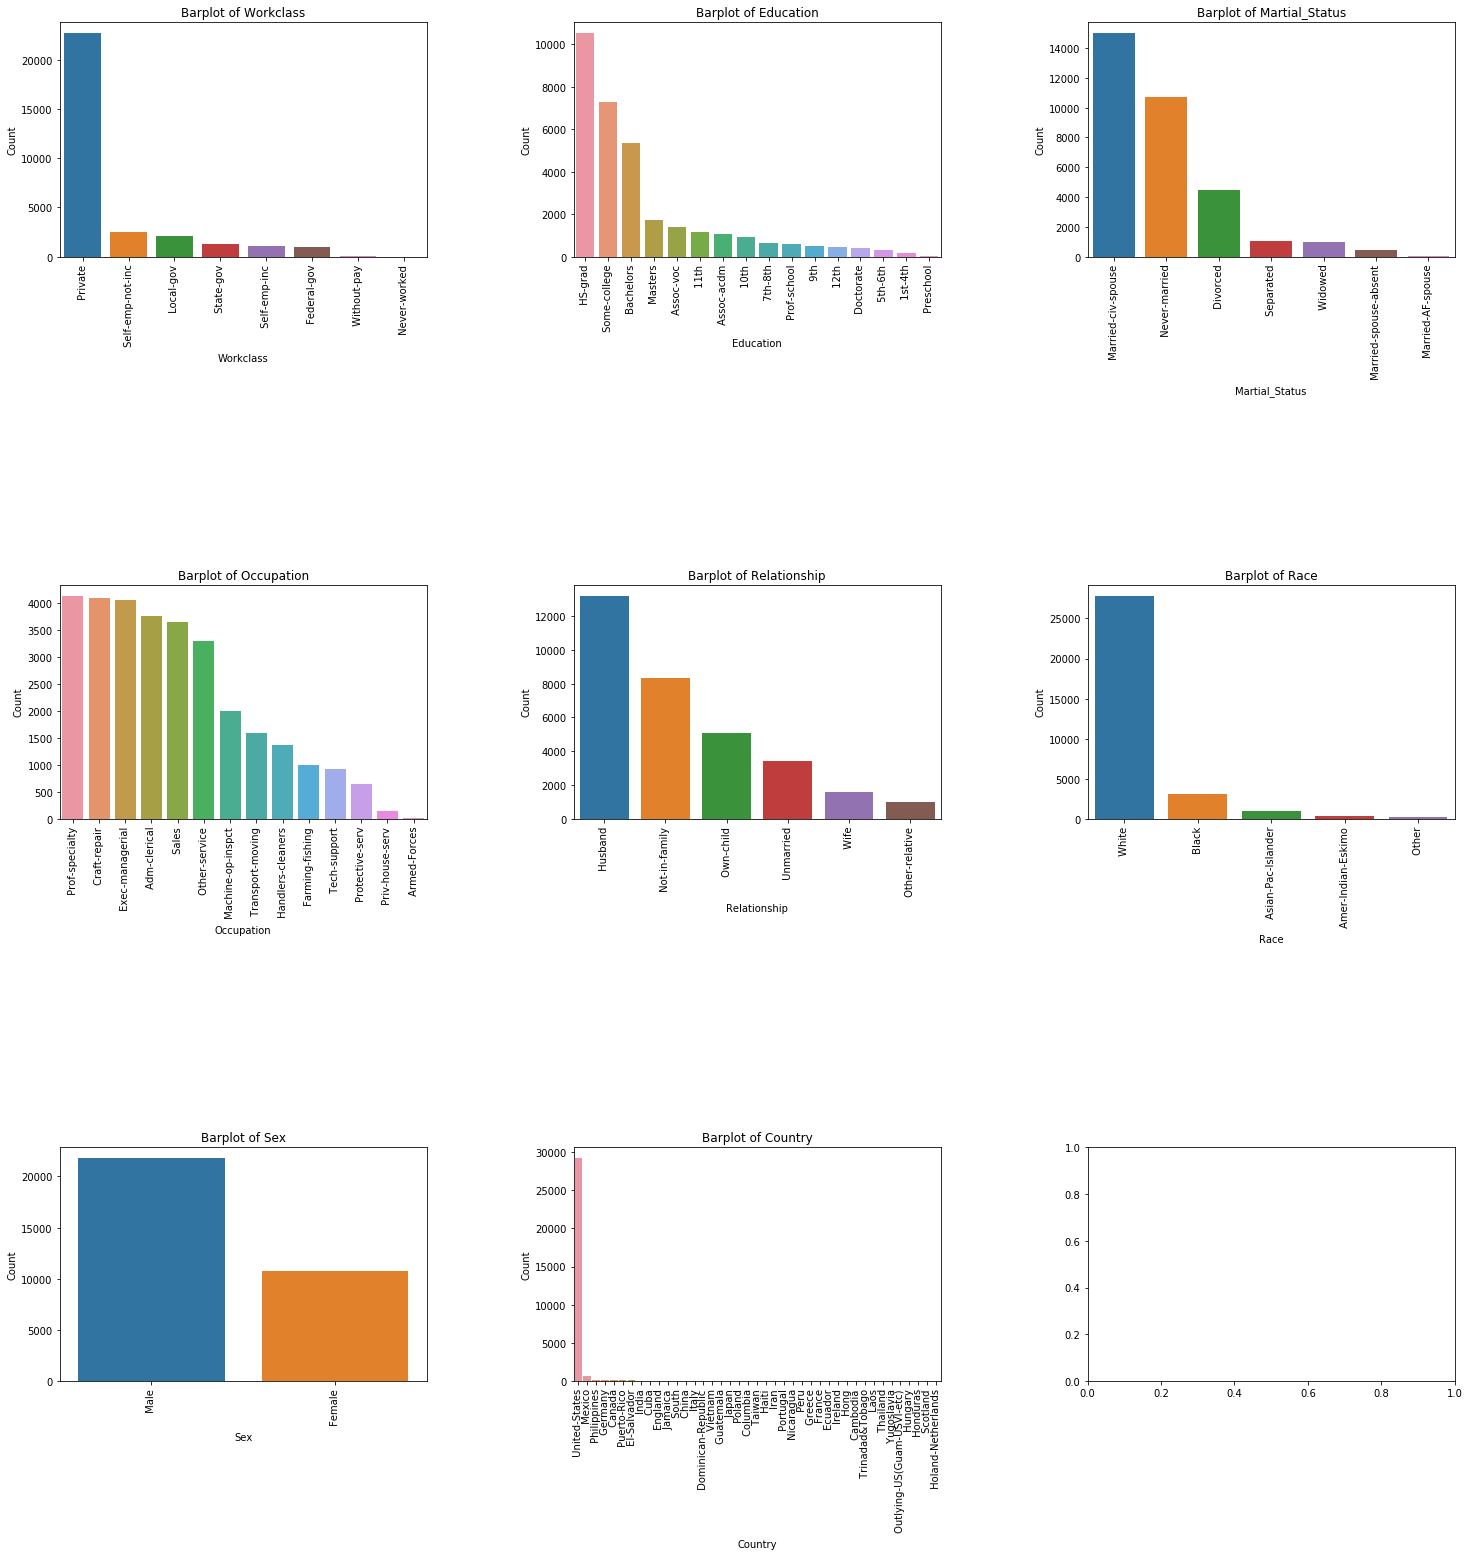

In [106]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
plt.subplots_adjust(hspace=1.4, wspace = 0.4)
for i, j in np.ndindex(axes.shape):
    if (3* i + j) < len(cat_features) :
        plot_bar(data_train, cat_features[3*i + j], axes[i, j])

### Calculate the percentage of adults from each country in the data *

In [113]:
(data_train['Country'].value_counts()*100 / data_train['Country'].value_counts().sum()).head()

 United-States    91.218963
 Mexico            2.010757
 Philippines       0.619176
 Germany           0.428420
 Canada            0.378385
Name: Country, dtype: float64

### Check the data types of train and test data *

In [114]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education_Num     32561 non-null int64
Martial_Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_per_week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [115]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
Age               16281 non-null object
Workclass         15318 non-null object
fnlwgt            16281 non-null float64
Education         16281 non-null object
Education_Num     16281 non-null float64
Martial_Status    16281 non-null object
Occupation        15315 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital_Gain      16281 non-null float64
Capital_Loss      16281 non-null float64
Hours_per_week    16281 non-null float64
Country           16007 non-null object
Target            16281 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 2.0+ MB


### As we have seen in the earlier task, the data type of age in the test data is object type, so we will have to convert the data type of `Age` column in the test data to `int` type. 

In [120]:
data_test['Age'] = data_test['Age'].astype('int')

In [121]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         15318 non-null object
fnlwgt            16281 non-null float64
Education         16281 non-null object
Education_Num     16281 non-null float64
Martial_Status    16281 non-null object
Occupation        15315 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital_Gain      16281 non-null float64
Capital_Loss      16281 non-null float64
Hours_per_week    16281 non-null float64
Country           16007 non-null object
Target            16281 non-null int64
dtypes: float64(5), int64(2), object(8)
memory usage: 2.0+ MB


### Also cast all float features to int type to keep types consistent between our train and test data.

In [122]:
for cols in num_features:
    data_test[cols] = data_test[cols].astype(int)

In [123]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 1 to 16281
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         15318 non-null object
fnlwgt            16281 non-null int64
Education         16281 non-null object
Education_Num     16281 non-null int64
Martial_Status    16281 non-null object
Occupation        15315 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital_Gain      16281 non-null int64
Capital_Loss      16281 non-null int64
Hours_per_week    16281 non-null int64
Country           16007 non-null object
Target            16281 non-null int64
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


### We have to treat categorical and numerical data in different ways for cleaning the data and encoding, so we will have to store these in two different columns. Choose categorical and continuous features from train data and store in different variables. 

In [124]:
cat_features, num_features

(Index(['Workclass', 'Education', 'Martial_Status', 'Occupation',
        'Relationship', 'Race', 'Sex', 'Country'],
       dtype='object'),
 ['Age',
  'fnlwgt',
  'Education_Num',
  'Capital_Gain',
  'Capital_Loss',
  'Hours_per_week',
  'Target'])

### As we have already separated the numerical and categorical columns, we will fill in missing data for continuous features with their median values, for categorical features with their mode

In [133]:
for cols in num_features:
    data_train[cols].fillna(data_train[cols].median(), inplace = True)
    data_test[cols].fillna(data_test[cols].median(), inplace = True)

In [143]:
for cols in cat_features:
    data_train[cols].fillna(data_train[cols].mode()[0], inplace = True)
    data_test[cols].fillna(data_test[cols].mode()[0], inplace = True)

In [144]:
data_train.isna().any()

Age               False
Workclass         False
fnlwgt            False
Education         False
Education_Num     False
Martial_Status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_Gain      False
Capital_Loss      False
Hours_per_week    False
Country           False
Target            False
dtype: bool

### Machines only understand numbers, so we will have to represent the categorical variables in a way so that the computer understands it, so we will first label encode and then one hot encode the categorical variables. We'll dummy code some categorical features: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [145]:
for cols in cat_features:
    data_train[cols] = le.fit_transform(data_train[cols])
    data_test[cols] = le.fit_transform(data_test[cols])

In [146]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [148]:
data_train.head()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Split train and test data into X_train ,y_train,X_test and y_test data

In [157]:
X_train = data_train.iloc[ : , : -1]
y_train = data_train.iloc[ : , -1]

In [158]:
X_test = data_test.iloc[ : , : -1]
y_test = data_test.iloc[ : , -1]

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [165]:
dtree = DecisionTreeClassifier(max_depth=3,random_state=17)

In [166]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [167]:
y_pred = dtree.predict(X_test)

In [168]:
accuracy_score(y_test, y_pred)

0.839199066396413

### We see that the accuracy we got is 84% without using parameter tuning Now lets see if we can increase our model accuracy by using Decision tree with parameter tuning
* Create a dictionary with Key as `'max_depth'` and value as `range(2,11)` and save it as tree_params.
* Train a decision tree (DecisionTreeClassifier(random_state = 17),tree_params). Find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).

In [170]:
tree_params = {'max_dept' : range(2, 11)}
tree_params

{'max_dept': range(2, 11)}

In [171]:
locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17), param_grid=tree_params, cv=5)

In [ ]:
lo

### Print out optimal maximum depth(i.e. best_params_ attribute of GridSearchCV) and best_score_  

### Train a decision tree with maximum depth of 9 (it is the best max_depth in my case), and compute the test set accuracy. Use parameter random_state = 17 for reproducibility.

### Lets plot the decision tree and see its distibution of classes

* Use the tree.export_graphviz() module to create the graphic visualization object of the learned tree classifier .Input the parameters tuned_tree, out_file=None, feature_names=X_train.columns, filled = True, class_names=['class_no','class_yes'] and save it as dot_data

* Use the pydotplus.graph_from_dot_data() module to draw the graph. Save it as graph

* To display the graph we save the above created image into a file and display it using matplotlib as  Image(graph.create_png())